In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [10]:
np.random.seed(16) # for reproducibility

# network and training
NB_EPOCH = 15
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of digits
N_HIDDEN = 256
VALIDATION_SPLIT = 0.2 # train and validation
DROPOUT = 0.20
RESHAPED = 784 # 28 X 28

# data: shuffle and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)

# normalize 
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

(60000, 784)
(10000, 784)


In [12]:
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(512, input_shape=(RESHAPED,),activation = 'relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN, activation = 'relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES, activation = 'softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [13]:
fit_model = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 7s 156us/step - loss: 0.3360 - acc: 0.8993 - val_loss: 0.1477 - val_acc: 0.9564
Epoch 2/15
48000/48000 [==============================] - 7s 153us/step - loss: 0.1353 - acc: 0.9596 - val_loss: 0.1003 - val_acc: 0.9689
Epoch 3/15
48000/48000 [==============================] - 7s 150us/step - loss: 0.0926 - acc: 0.9720 - val_loss: 0.0881 - val_acc: 0.9727
Epoch 4/15
48000/48000 [==============================] - 7s 149us/step - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0760 - val_acc: 0.9766
Epoch 5/15
48000/48000 [==============================] - 7s 153us/step - loss: 0.0580 - acc: 0.9817 - val_loss: 0.0804 - val_acc: 0.9757
Epoch 6/15
48000/48000 [==============================] - 7s 155us/step - loss: 0.0465 - acc: 0.9854 - val_loss: 0.0735 - val_acc: 0.9799
Epoch 7/15
48000/48000 [==============================] - 8s 171us/step - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0741 - 

In [14]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(fit_model.history.keys())

10000/10000 [==============================] - 0s 44us/step

Test score: 0.060674647980308874
Test accuracy: 0.983
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


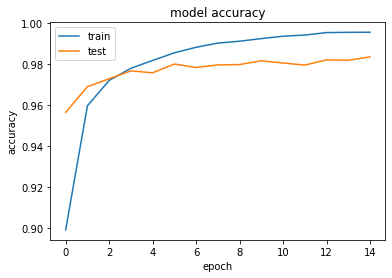

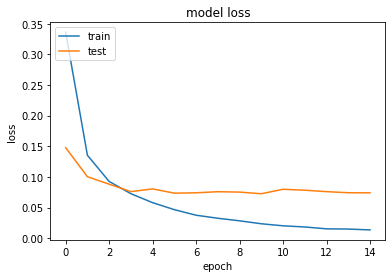

In [15]:
# summarize history for accuracy
plt.plot(fit_model.history['acc'])
plt.plot(fit_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()